In [1]:
# Import needed libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])



In [2]:
df.sample(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
15101,Data Engineer,Data engineer,"Rotterdam, Netherlands",via Indeed,Full-time,False,Netherlands,2023-06-20 13:20:50,True,False,Netherlands,None,NaN,NaN,Michael Page,"['shell', 'sql', 'sql server', 'azure', 'unix']","{'cloud': ['azure'], 'databases': ['sql server..."
418843,Data Engineer,Senior- Data Engineer,"Mumbai, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-02-13 16:29:01,False,False,India,None,NaN,NaN,LTIMindtree,"['scala', 'python', 'sql', 'shell', 'nosql', '...","{'cloud': ['oracle'], 'libraries': ['hadoop', ..."
487377,Data Analyst,"Data Analyst, Power BI","Espoo, Finland",via LinkedIn Finland,Full-time,False,Finland,2023-08-11 11:33:50,True,False,Finland,None,NaN,NaN,Analyse²,"['sql', 'power bi', 'dax', 'flow']","{'analyst_tools': ['power bi', 'dax'], 'other'..."


In [3]:
job_title_counts = df.job_title_short.value_counts()

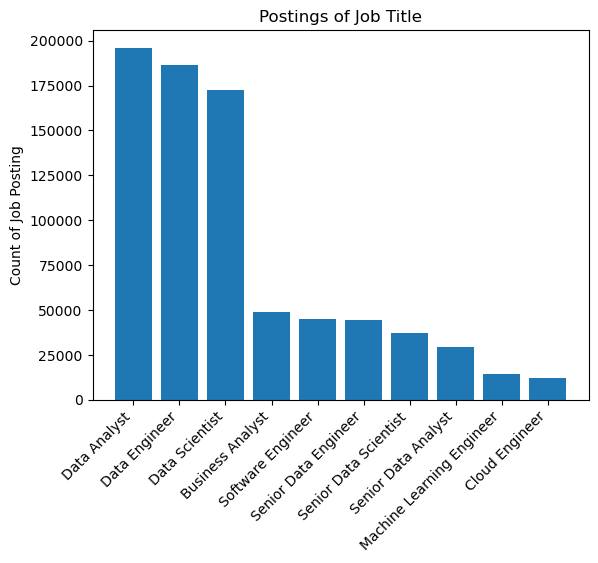

In [4]:
plt.bar(job_title_counts.index, job_title_counts)
plt.xticks(rotation = 45, ha = 'right')
plt.title('Postings of Job Title')
plt.ylabel('Count of Job Posting') ;

<BarContainer object of 10 artists>

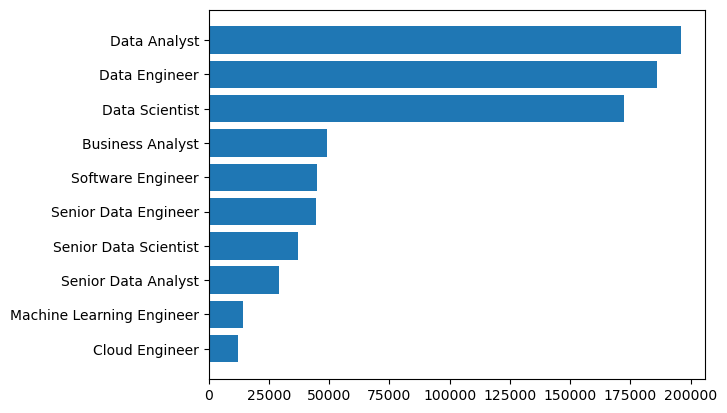

In [5]:
job_title_counts = job_title_counts.sort_values(ascending = True)

plt.barh(job_title_counts.index, job_title_counts)

In [6]:
df_salary_date = df[['job_posted_date', 'salary_year_avg']]

In [7]:
df_salary_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   job_posted_date  785741 non-null  datetime64[ns]
 1   salary_year_avg  22003 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 MB


In [10]:
df_salary_date = df_salary_date[df_salary_date['salary_year_avg'].notna()]

df_salary_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22003 entries, 28 to 785692
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   job_posted_date  22003 non-null  datetime64[ns]
 1   salary_year_avg  22003 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 515.7 KB


In [12]:
df_salary_date1 = df_salary_date.copy()

df_salary_date1['job_posted_year'] = df_salary_date1['job_posted_date'].dt.year

df_salary_date1['job_posted_month'] = df_salary_date1['job_posted_date'].dt.strftime('%B')

In [13]:
df_salary_date1

,job_posted_date,salary_year_avg,job_posted_year,job_posted_month
28,2023-08-01 13:37:57,109500.0,2023,August
77,2023-06-26 14:22:54,140000.0,2023,June
92,2023-02-21 13:29:59,120000.0,2023,February
100,2023-07-31 13:01:18,228222.0,2023,July
109,2023-10-12 13:02:19,89000.0,2023,October
...,...,...,...,...
785624,2023-08-31 06:02:16,139216.0,2023,August
785641,2023-01-04 16:36:07,150000.0,2023,January
785648,2023-04-12 06:02:51,221875.0,2023,April
785682,2023-03-04 06:16:08,157500.0,2023,March


In [16]:
%pip list

Package                   Version
------------------------- -----------
aiohappyeyeballs          2.4.4
aiohttp                   3.11.10
aiosignal                 1.2.0
anyio                     4.7.0
argon2-cffi               21.3.0
argon2-cffi-bindings      21.2.0
asttokens                 3.0.0
async-lru                 2.0.4
attrs                     24.3.0
babel                     2.16.0
beautifulsoup4            4.13.4
bleach                    6.2.0
Bottleneck                1.4.2
Brotli                    1.0.9
brotlicffi                1.0.9.2
certifi                   2025.8.3
cffi                      1.17.1
charset-normalizer        3.3.2
colorama                  0.4.6
comm                      0.2.3
conllu                    4.4.1
contourpy                 1.3.1
cycler                    0.11.0
datasets                  4.0.0
debugpy                   1.8.16
decorator                 5.2.1
defusedxml                0.7.1
dill                      0.3.8
et-xmlfile       

In [17]:
df_jobtitle_salary = df[['job_title_short', 'salary_year_avg']].dropna(subset = 'salary_year_avg')

In [18]:
df_jobtitle_salary

,job_title_short,salary_year_avg
28,Data Scientist,109500.0
77,Data Engineer,140000.0
92,Data Engineer,120000.0
100,Data Scientist,228222.0
109,Data Analyst,89000.0
...,...,...
785624,Data Engineer,139216.0
785641,Data Engineer,150000.0
785648,Data Scientist,221875.0
785682,Data Scientist,157500.0


In [19]:
df_jobtitle_salary.groupby('job_title_short')['salary_year_avg'].median()

job_title_short
Business Analyst              85000.0
Cloud Engineer                90000.0
Data Analyst                  90000.0
Data Engineer                125000.0
Data Scientist               127500.0
Machine Learning Engineer    106415.0
Senior Data Analyst          111175.0
Senior Data Engineer         147500.0
Senior Data Scientist        155500.0
Software Engineer             99150.0
Name: salary_year_avg, dtype: float64

In [26]:
df_jobtitle_salary.groupby('job_title_short')['salary_year_avg'].median().sort_values()

job_title_short
Business Analyst              85000.0
Cloud Engineer                90000.0
Data Analyst                  90000.0
Software Engineer             99150.0
Machine Learning Engineer    106415.0
Senior Data Analyst          111175.0
Data Engineer                125000.0
Data Scientist               127500.0
Senior Data Engineer         147500.0
Senior Data Scientist        155500.0
Name: salary_year_avg, dtype: float64

In [20]:
df_jobtitle_salary.groupby('job_title_short').agg({'salary_year_avg' : 'median'})

,salary_year_avg
job_title_short,
Business Analyst,85000.0
Cloud Engineer,90000.0
Data Analyst,90000.0
Data Engineer,125000.0
Data Scientist,127500.0
Machine Learning Engineer,106415.0
Senior Data Analyst,111175.0
Senior Data Engineer,147500.0
Senior Data Scientist,155500.0


In [23]:
df_jobtitle_salary.groupby('job_title_short').agg({'salary_year_avg' : 'median'}).sort_values('salary_year_avg',
                                                                                              ascending = False)

,salary_year_avg
job_title_short,
Senior Data Scientist,155500.0
Senior Data Engineer,147500.0
Data Scientist,127500.0
Data Engineer,125000.0
Senior Data Analyst,111175.0
Machine Learning Engineer,106415.0
Software Engineer,99150.0
Cloud Engineer,90000.0
Data Analyst,90000.0


In [29]:
df_jobtitle_salary.groupby('job_title_short').agg({'salary_year_avg' : 'median'}).sort_values(by = 'job_title_short')

,salary_year_avg
job_title_short,
Business Analyst,85000.0
Cloud Engineer,90000.0
Data Analyst,90000.0
Data Engineer,125000.0
Data Scientist,127500.0
Machine Learning Engineer,106415.0
Senior Data Analyst,111175.0
Senior Data Engineer,147500.0
Senior Data Scientist,155500.0


<Axes: ylabel='job_title_short'>

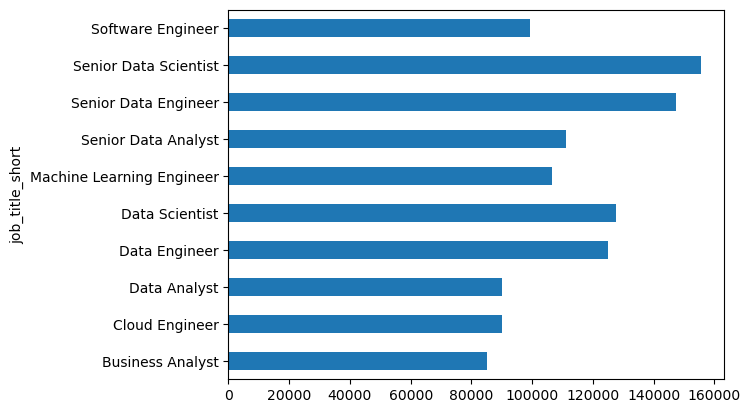

In [30]:
job_salary = df_jobtitle_salary.groupby('job_title_short')['salary_year_avg'].median()

job_salary.plot(kind = 'barh')

<Axes: ylabel='job_title_short'>

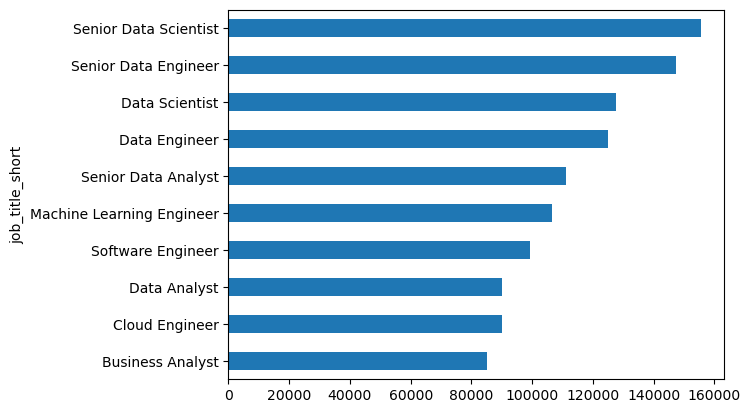

In [31]:
job_salary.sort_values().plot(kind = 'barh')